
# Классификация деревом принятия решений

In [1]:
from cgtnnlib.datasets import datasets

datasets

In [2]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [3]:
dataset = datasets[0]
print('Target:', dataset.target)
train_df = dataset.data.train_df
test_df = dataset.data.test_df
test_target = test_df[dataset.target]
test_df = test_df.drop(dataset.target, axis=1)
X = train_df.drop(dataset.target, axis=1, inplace=False)
y = train_df[dataset.target]

(X, y)

Target: diagnosis
File data/wisc_bc_data.csv exists and SHA1 matches, skipping download.


(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 421       15.100         22.02           97.26      712.8          0.09056   
 275       28.110         18.47          188.50     2499.0          0.11420   
 154       14.410         19.73           96.03      651.0          0.08757   
 287       19.890         20.26          130.50     1214.0          0.10370   
 477       21.100         20.52          138.10     1384.0          0.09684   
 ..           ...           ...             ...        ...              ...   
 367        9.755         28.20           61.68      290.9          0.07984   
 554       13.210         25.25           84.10      537.9          0.08791   
 458        8.671         14.45           54.42      227.2          0.09138   
 537       11.700         19.11           74.33      418.7          0.08814   
 88        21.160         23.04          137.20     1404.0          0.09428   
 
      compactness_mean  concavity_mean  points_mea

In [4]:
model.fit(X, y)

DecisionTreeClassifier()

In [5]:
def percent(fraction: float) -> str:
    return f'{fraction * 100:.2f}%'

In [6]:
y_pred = model.predict(test_df)
score = model.score(test_df, test_target)
diff = y_pred - test_target
missclassified_count = diff[diff != 0].count()
correct_count = len(y_pred) - missclassified_count

print(f'Total: {correct_count}/{len(y_pred)} ({percent(score)})')
print(f'Predicted values:\n{y_pred}')
print(f'Actual values:\n{test_target.values}')
print(f'Diff: {diff.values}')

Total: 109/114 (95.61%)
Predicted values:
[1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1]
Actual values:
[1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1]
Diff: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]


In [7]:
model.get_depth()

8

In [8]:
model.get_n_leaves()

23

In [9]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [18]:
dataset.data.df.columns.drop(dataset.target)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="Times New Roman"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="Times New Roman"] ;
0 [label=<node &#35;0<br/>points_worst &le; 0.14545<br/>gini = 0.474377<br/>samples = 100.0%<br/>value = [0.386813, 0.613187]<br/>class = yes>, fillcolor="#b6dbf5"] ;
1 [label=<node &#35;1<br/>area_worst &le; 957.450012<br/>gini = 0.173098<br/>samples = 66.6%<br/>value = [0.09571, 0.90429]<br/>class = yes>, fillcolor="#4ea7e8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<node &#35;2<br/>points_worst &le; 0.13185<br/>gini = 0.074717<br/>samples = 62.2%<br/>value = [0.038869, 0.961131]<br/>class = yes>, fillcolor="#41a1e6"] ;
1 -> 2 ;
3 [label=<node &#35;3<br/>dimension_worst &le; 0.055125<br/>gini = 0.03744<br/>samples = 57.6%<br/>value = [0.019084, 0.980916]<br/>class = yes>, fillcolor="#3d9fe6"] ;
2 -> 3 ;
4 [label=<node &#35;4<br/>gini = 0.0<br/>samples = 0.2%<br/>value = [1.

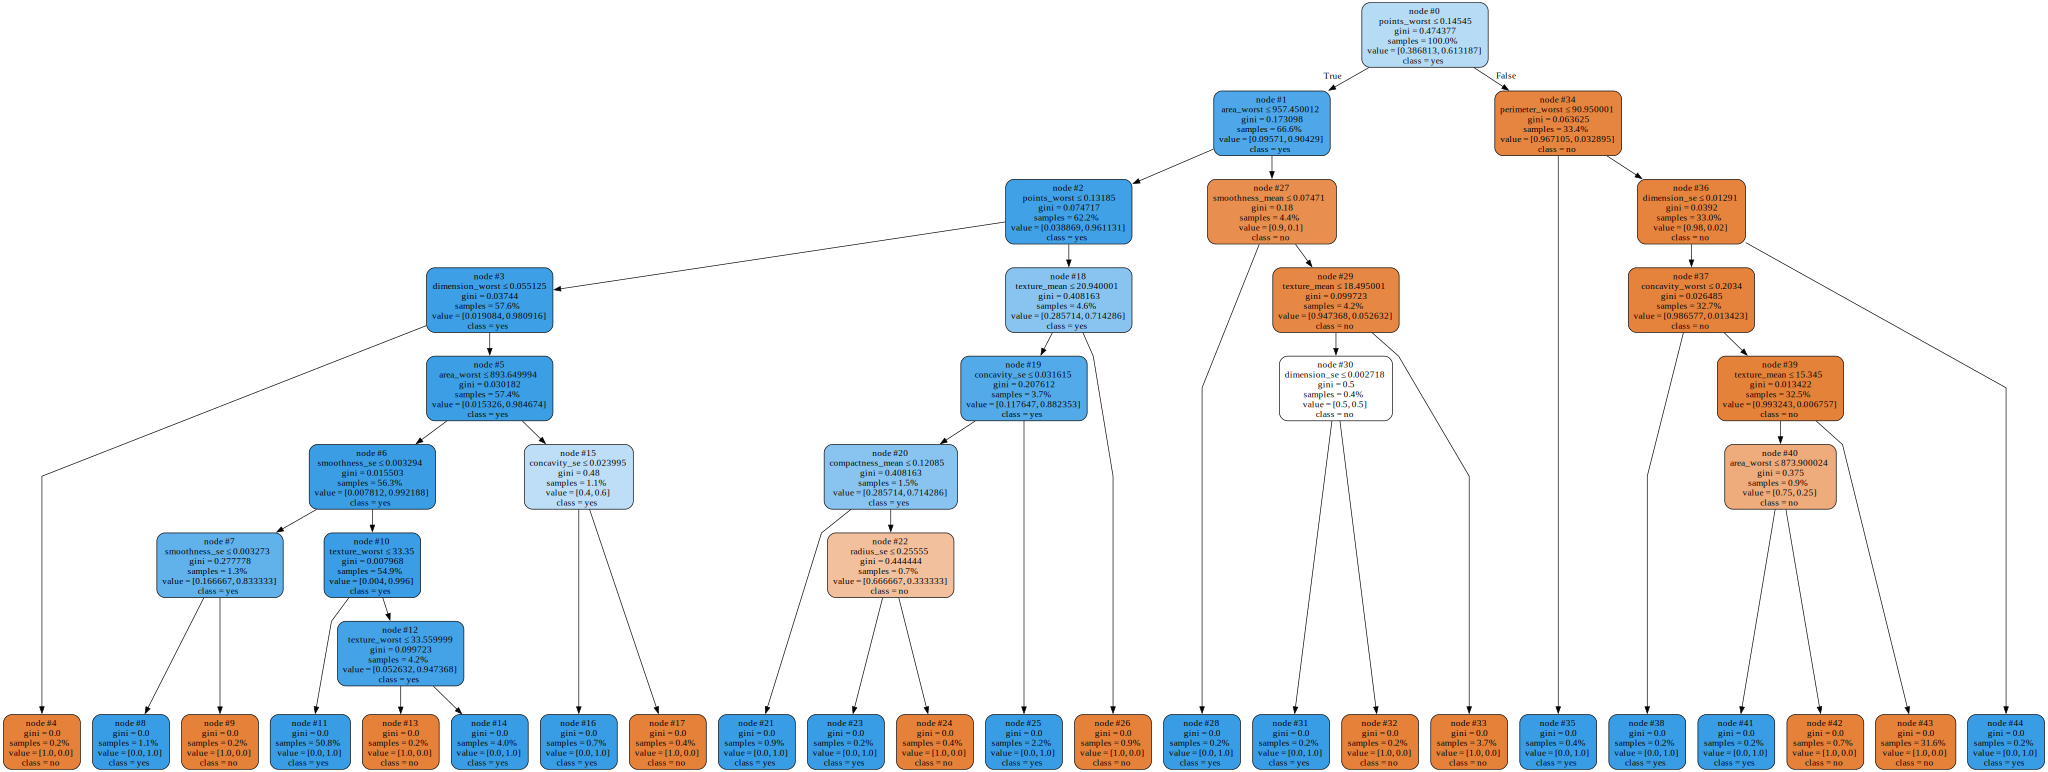

In [49]:

import graphviz

graphviz_source = tree.export_graphviz(
    decision_tree=model,
    feature_names=dataset.data.df.columns.drop(dataset.target),
    class_names=['no', 'yes'],
    filled=True,
    leaves_parallel=True,
    node_ids=True,
    proportion=True,
    # rotate=True,
    rounded=True,
    special_characters=True,
    precision=6, # digits after point
    fontname='Times New Roman',
    # fontname='Big Caslon',
    # fontname='Brush Script MT',
)
print(graphviz_source)
graphviz.Source(graphviz_source)

# Визуализация

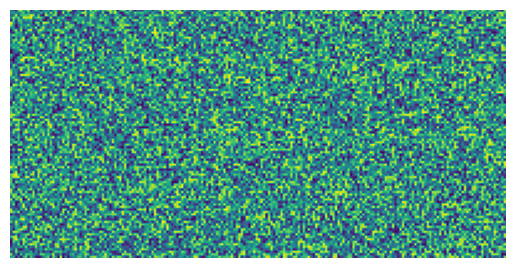

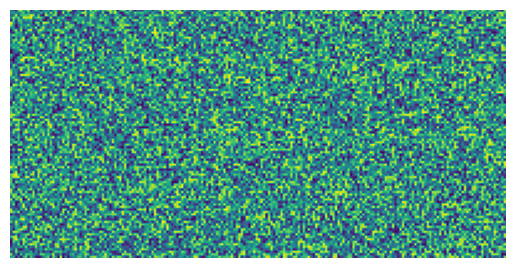

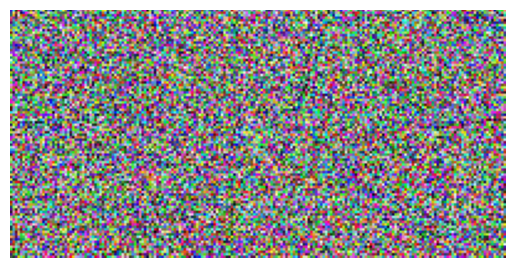

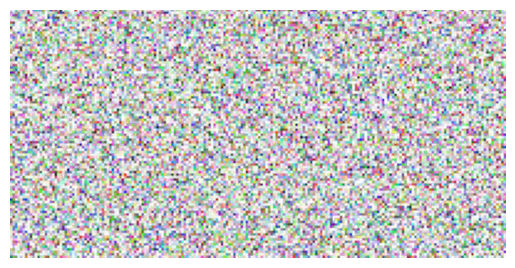

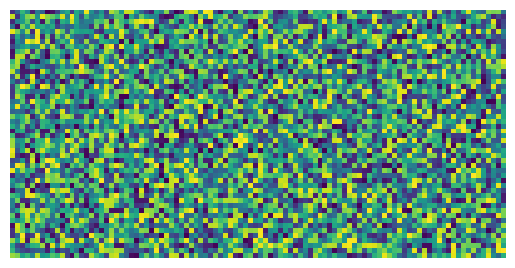

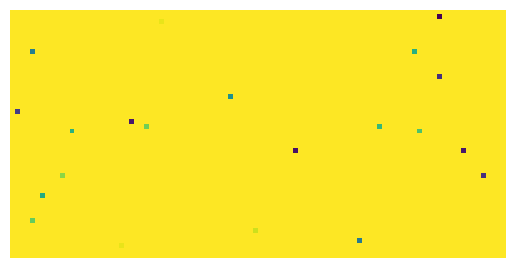

/var/folders/m9/y193wddj505gjbgjyvhjmzjm0000gq/T/ipykernel_13268/3650596904.py:22: RuntimeWarning: invalid value encountered in cast
  array = (array * 255).astype(np.uint8)  # Convert to uint8 for PIL


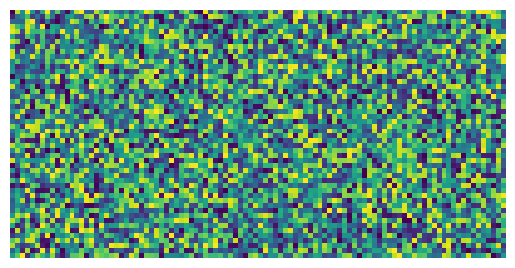

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt  # Optional: for inline display using matplotlib

def visualize_array_with_pillow(array, cmap=None):
    """
    Visualizes a NumPy array as an image using Pillow.

    Args:
        array:  A NumPy array representing the image data.
                - It can be a 2D array (grayscale) or a 3D array (RGB or RGBA).
                - The data type should typically be uint8 (0-255) or float32/64 (0.0-1.0).
        cmap: (Optional) Colormap to use for grayscale images.
              If None (default) grayscale images are displayed directly.
              You can specify a matplotlib colormap name like 'viridis', 'magma', 'gray', etc.
    """

    # Check the array's data type and scale it if necessary.  PIL requires uint8 or floats in [0, 1].
    if array.dtype == np.float32 or array.dtype == np.float64:
        # Ensure the array is in the range 0.0 to 1.0
        array = np.clip(array, 0.0, 1.0)
        array = (array * 255).astype(np.uint8)  # Convert to uint8 for PIL

    elif array.dtype != np.uint8:
        # Attempt to scale to uint8, assuming the array represents values in a different range
        print("Warning: Array data type is not uint8 or float.  Attempting to scale to uint8.")
        try:
            array = ((array - array.min()) / (array.max() - array.min()) * 255).astype(np.uint8)
        except ValueError: # Avoid NaN errors
            print("Error: Array contains NaN values or all values are the same. Cannot normalize.  Returning.")
            return

    # Determine image mode based on the array's shape
    if len(array.shape) == 2:  # Grayscale
        mode = 'L'  # L stands for Luminance (grayscale)
        if cmap:
             # Apply a matplotlib colormap if requested
            plt.imshow(array, cmap=cmap)
            plt.axis('off')
            plt.show()
            return # Important: return here, Pillow does not handle colormaps natively.
    elif len(array.shape) == 3:
        if array.shape[2] == 3:  # RGB
            mode = 'RGB'
        elif array.shape[2] == 4:  # RGBA
            mode = 'RGBA'
        else:
            raise ValueError("Array must have 2 (grayscale) or 3/4 (RGB/RGBA) channels.")
    else:
        raise ValueError("Array must be 2D or 3D.")

    # Create a PIL Image object
    try:
        image = Image.fromarray(array, mode=mode)
    except ValueError as e:
        print(f"Error creating Pillow image: {e}")
        print("Check array shape and data type.")
        return


    # Display the image in the Jupyter Notebook
    # image.show() # Will open the image in the system's default image viewer.
    #Alternative: Display image in the notebook with matplotlib (more common)
    plt.imshow(image)
    plt.axis('off') # Hide axis labels
    plt.show()


# Example Usage
# 1. Grayscale Example
gray_array = np.random.randint(0, 256, size=(100, 200), dtype=np.uint8)
visualize_array_with_pillow(gray_array)
visualize_array_with_pillow(gray_array, cmap='viridis') #With colormap

# 2. RGB Example
rgb_array = np.random.randint(0, 256, size=(100, 200, 3), dtype=np.uint8)
visualize_array_with_pillow(rgb_array)

# 3. RGBA Example (with transparency)
rgba_array = np.random.randint(0, 256, size=(100, 200, 4), dtype=np.uint8)
visualize_array_with_pillow(rgba_array)

# 4. Float array example
float_array = np.random.rand(50, 100) # values from 0.0 to 1.0
visualize_array_with_pillow(float_array)

# 5. Float array with larger values
float_array2 = np.random.rand(50, 100) * 255.0  # Values from 0.0 to 255.0
visualize_array_with_pillow(float_array2) # Will need to be scaled.

# 6. Array with NaN values
nan_array = np.random.rand(50, 100)
nan_array[0,0] = np.nan #Introduce NaN
visualize_array_with_pillow(nan_array) #Handles the nan value and prints an error message.

# Сравнение с обычным дропаутом